In [7]:
import pandas as pd

# List of CSV file paths
file_paths = [
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_cpu_utilization_24ae8d.csv",
    "/content/ec2_cpu_utilization_53ea38.csv",
    "/content/ec2_cpu_utilization_825cc2.csv",
    "/content/ec2_cpu_utilization_ac20cd.csv",
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_disk_write_bytes_1ef3de.csv",
    "/content/ec2_disk_write_bytes_c0d644.csv",
    "/content/ec2_network_in_5abac7.csv",
    "/content/ec2_network_in_257a54.csv",
    "/content/elb_request_count_8c0756.csv",
    "/content/grok_asg_anomaly.csv",
    "/content/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv",
    "/content/rds_cpu_utilization_cc0c53.csv"
]

# Load each CSV file into a DataFrame and merge them
dfs = [pd.read_csv(file) for file in file_paths]
merged_data = pd.concat(dfs)

# Assuming each CSV file has a timestamp column, ensure it is recognized as datetime
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

# Optionally, you can sort the DataFrame by timestamp
merged_data = merged_data.sort_values(by='timestamp')

# Display the merged data
print(merged_data.tail(100))

               timestamp       value
3994 2014-04-23 21:34:00      91.000
3995 2014-04-23 21:39:00      83.000
4001 2014-04-23 21:39:00      93.374
4001 2014-04-23 21:39:00  277197.000
4002 2014-04-23 21:44:00      94.376
...                  ...         ...
4027 2014-04-24 00:19:00      32.000
4028 2014-04-24 00:24:00      57.000
4029 2014-04-24 00:29:00      10.000
4030 2014-04-24 00:34:00      18.000
4031 2014-04-24 00:39:00      60.000

[100 rows x 2 columns]


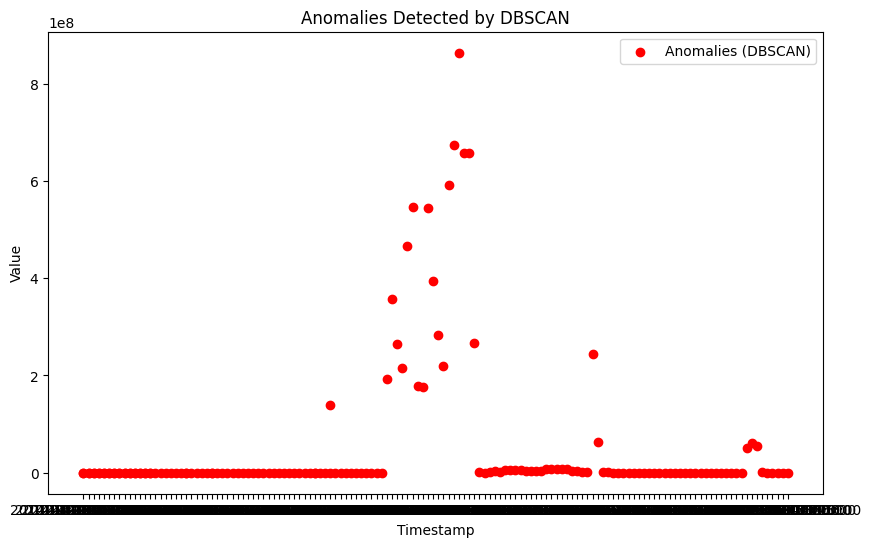

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Function to process data chunk using DBSCAN
def process_chunk(chunk):
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(chunk[['value']].values)

    # Define DBSCAN parameters
    eps = 0.1  # Adjust epsilon as needed
    min_samples = 5  # Adjust min_samples as needed

    # Fit DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(scaled_data)

    # Extract anomaly indices
    anomaly_mask = dbscan.labels_ == -1
    anomalies = chunk[anomaly_mask]

    return anomalies

# List of CSV file paths
file_paths = [
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_cpu_utilization_24ae8d.csv",
    "/content/ec2_cpu_utilization_53ea38.csv",
    "/content/ec2_cpu_utilization_825cc2.csv",
    "/content/ec2_cpu_utilization_ac20cd.csv",
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_disk_write_bytes_1ef3de.csv",
    "/content/ec2_disk_write_bytes_c0d644.csv",
    "/content/ec2_network_in_5abac7.csv",
    "/content/ec2_network_in_257a54.csv",
    "/content/elb_request_count_8c0756.csv",
    "/content/grok_asg_anomaly.csv",
    "/content/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv",
    "/content/rds_cpu_utilization_cc0c53.csv"
]

# Process data in chunks
chunk_size = 1000  # Adjust chunk size as needed
anomalies = []

for file_path in file_paths:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        anomalies.append(process_chunk(chunk))

# Concatenate anomalies detected in all chunks
anomalies_dbscan = pd.concat(anomalies)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(anomalies_dbscan['timestamp'], anomalies_dbscan['value'], color='red', label='Anomalies (DBSCAN)')
plt.title('Anomalies Detected by DBSCAN')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


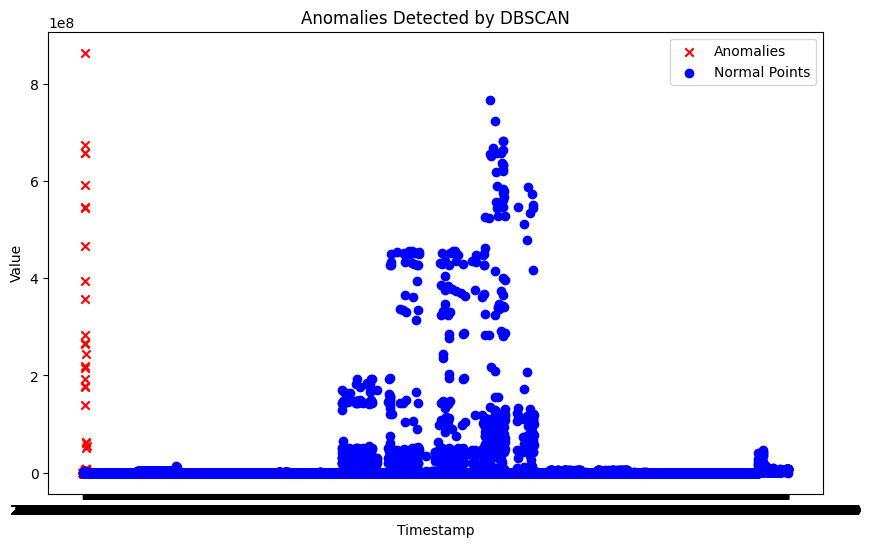

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Function to process data chunk using DBSCAN
def process_chunk(chunk):
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(chunk[['value']].values)

    # Define DBSCAN parameters
    eps = 0.1  # Adjust epsilon as needed
    min_samples = 5  # Adjust min_samples as needed

    # Fit DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(scaled_data)

    # Extract anomaly indices
    anomaly_mask = dbscan.labels_ == -1
    anomalies = chunk[anomaly_mask]
    normals = chunk[~anomaly_mask]

    return anomalies, normals

# List of CSV file paths
file_paths = [
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_cpu_utilization_24ae8d.csv",
    "/content/ec2_cpu_utilization_53ea38.csv",
    "/content/ec2_cpu_utilization_825cc2.csv",
    "/content/ec2_cpu_utilization_ac20cd.csv",
    "/content/ec2_cpu_utilization_c6585a.csv",
    "/content/ec2_disk_write_bytes_1ef3de.csv",
    "/content/ec2_disk_write_bytes_c0d644.csv",
    "/content/ec2_network_in_5abac7.csv",
    "/content/ec2_network_in_257a54.csv",
    "/content/elb_request_count_8c0756.csv",
    "/content/grok_asg_anomaly.csv",
    "/content/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv",
    "/content/rds_cpu_utilization_cc0c53.csv"
]

# Process data in chunks
chunk_size = 1000  # Adjust chunk size as needed
anomalies = []
normals = []

for file_path in file_paths:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_anomalies, chunk_normals = process_chunk(chunk)
        anomalies.append(chunk_anomalies)
        normals.append(chunk_normals)

# Concatenate anomalies and normal points detected in all chunks
anomalies_dbscan = pd.concat(anomalies)
normals_dbscan = pd.concat(normals)

# Visualize anomalies and normal points
plt.figure(figsize=(10, 6))
plt.scatter(anomalies_dbscan['timestamp'], anomalies_dbscan['value'], color='red', marker='x', label='Anomalies')
plt.scatter(normals_dbscan['timestamp'], normals_dbscan['value'], color='blue', marker='o', label='Normal Points')
plt.title('Anomalies Detected by DBSCAN')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()
